# <img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Project 1 Rubric

### Requirements

1. You need to perform an exhaustive exploration of your dataset.
2. Your code must show command and understanding of Python (Codeacademy and class 1,2,3 notes)
3. You need to define functions (no matter how complicated they are)
4. You don't need to do any modeling

    1. Load and clean, if neccessary, the data with pandas.
    2. Describe the data and investigate any outliers.
    3. Explore relationships between the variables.
    4. Visualize at least five variables of your choice with appropriate visualizations. They should be readable.
    5. Visualize subsets of the variables you chose, subsetted conditional on some other variable. 

5. Write a brief report on at least 5 things you found interesting about the data or, if it doesn't interest you at all, things you found out and why they are boring.

In [131]:
# Import Data Modules, Plotting Modules, and Stats/Regressions Packages
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import decomposition
from sklearn.decomposition import PCA
from matplotlib.mlab import PCA
from scipy.misc import lena
from scipy.stats import mode
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [132]:
# Additional to importing the basic Data Modules, Plotting Modules, and Stats/Regressions Packages, 
# I imported packages for Principal Components Analysis. I will explain how I use this later on.

In [133]:
cd

/home/dsi-student


In [134]:
# Upload the Data Set
df = pd.read_csv('Desktop/ECON628-01-RPanlilio/ds1.csv')

In [135]:
# Replace Missing Data with Mean or No Answer
df.age = df.age.fillna(np.mean(df.age))
df.sex = df.sex.fillna('No Answer')
df.goo = df.goo.fillna('No Answer')
df.coo = df.coo.fillna('No Answer')
df.doa = df.doa.fillna(np.mean(df.doa))
df.famsize = df.famsize.fillna(np.mean(df.famsize))
df.bro = df.bro.fillna(np.mean(df.bro))
df.sis = df.sis.fillna(np.mean(df.sis))
df.sib = df.sib.fillna(np.mean(df.sib))
df.po = df.po.fillna('No Answer')
df.ind = df.ind.fillna('No Answer')
df.ref = df.ref.replace(1, 'Yes')
df.ref = df.ref.replace(0, 'No')
df.rei = df.rei.replace(1, 'Yes')
df.rei = df.rei.replace(0, 'No')
df.res = df.res.replace(1, 'Yes')
df.res = df.res.replace(0, 'No')
df.cit = df.cit.fillna('No Answer')
df.gov = df.gov.fillna('No Answer')
df.dis = df.dis.fillna('No Answer')
df.hfd = df.hfd.fillna('No Answer')
df.ffd = df.ffd.fillna('No Answer')
df.ad1 = df.ad1.fillna(np.mean(df.ad1))
df.ad2 = df.ad2.fillna(np.mean(df.ad2))
df.ad3 = df.ad3.fillna(np.mean(df.ad3))
df.ad4 = df.ad4.fillna(np.mean(df.ad4))
df.ad5 = df.ad5.fillna(np.mean(df.ad5))
df.adp = df.adp.fillna(np.mean(df.adp))
df.a1 = df.a1.fillna(np.mean(df.a1))
df.a2 = df.a2.fillna(np.mean(df.a2))
df.a3 = df.a3.fillna(np.mean(df.a3))
df.d1 = df.d1.fillna(np.mean(df.d1))
df.d2 = df.d2.fillna(np.mean(df.d2))
df.d3 = df.d3.fillna(np.mean(df.d3))
df.p1 = df.p1.fillna(np.mean(df.p1))
df.p2 = df.p2.fillna(np.mean(df.p2))
df.p3 = df.p3.fillna(np.mean(df.p3))
df.p4 = df.p4.fillna(np.mean(df.p4))
df.p5 = df.p5.fillna(np.mean(df.p5))
df.p6 = df.p6.fillna(np.mean(df.p6))

In [136]:
# In cleaning my data, I replaced most of the missing data with the mean value.
# For other data, I replaced it with string values of Yes, No, or No Answer.

In [137]:
df

,age,sex,goo,coo,doa,famsize,bro,sis,sib,po,...,a3,d1,d2,d3,p1,p2,p3,p4,p5,p6
0,3.000000,male,Damascus,No Answer,2013.00000,5.000000,3.000000,0.000000,3.000000,Unemployed,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3.000000,female,Daraa,Da'el,2015.00000,4.000000,1.000000,1.000000,4.662722,Unemployed,...,1.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4.000000,male,Daraa,Teeba,2012.00000,6.000000,2.000000,2.000000,4.662722,Unemployed,...,1.0,1.0,1.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4.000000,male,Daraa,Busra al-Sham,2012.00000,7.000000,3.000000,2.000000,4.662722,Unemployed,...,1.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
4,4.000000,male,Daraa,No Answer,2013.00000,5.000000,3.000000,1.000000,4.662722,Unemployed,...,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,4.000000,male,No Answer,Jordan,2012.96068,5.000000,2.617619,2.475966,4.662722,No Answer,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
6,5.000000,male,Aleppo,No Answer,2013.00000,6.000000,3.000000,0.000000,3.000000,Cooking,...,1.0,0.0,0.0,0.0,0.301874,0.089262,0.121477,0.048322,0.019463,0.032798
7,5.000000,male,Damascus,Bilad al-Sham,2012.00000,5.000000,2.000000,1.000000,3.000000,Driver,...,1.0,1.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
8,5.000000,female,Daraa,No Answer,2013.00000,7.000000,2.000000,2.000000,4.662722,Businessman,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,5.000000,female,Daraa,Alma,2013.00000,6.000000,2.000000,1.000000,4.662722,Traveller,...,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000


In [143]:
# Normalizing Psychological Indicators
df_indicators = df[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'a1', 'a2', 'a3', 'd1', 'd2', 'd3', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6']]
df_norm = (df_indicators - df_indicators.mean()) / df_indicators.std()

# Grouping Psychological Indicators into Anxiety, Depression, and PTSD
df_anxiety = df_norm[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'a1', 'a2', 'a3']]
df_depression = df_norm[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'd1', 'd2', 'd3']]
df_ptsd = df_norm[['adp', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6']]

# Performing PCA to reduce dimensionality
pca = decomposition.PCA()
pca.n_components = 1
anxiety = pca.fit_transform(df_anxiety)
depression = pca.fit_transform(df_depression)
ptsd = pca.fit_transform(df_ptsd)

# Grouping Psychological Indicators with Reduced Dimensionality
anx = pd.DataFrame(anxiety)
dep = pd.DataFrame(depression)
ptsd = pd.DataFrame(ptsd) 
psych = pd.concat([df.ref, anx, dep, ptsd], axis=1, join='inner')
psych.columns = ['Refugee Camp', 'Anxiety', 'Depression', 'PTSD']

In [140]:
# The dependent variables of interest are Likelihood of Anxiety, Depression, and PTSD. However, each of 
# these variables are composed of several indicators (Anxiety: 9 Indicators, Depression: 9 Indicators, 
# PTSD: 7 Indicators). To perform dimensionality reduction, I utilize Principal Components Analysis
# reducing my dependent variables from 25 to 3. 

In [141]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1514.0,9.095344,2.196660,3.0,7.000000,9.095344,11.000000,17.0
doa,1514.0,2012.960680,0.640939,2008.0,2012.960680,2012.960680,2013.000000,2016.0
famsize,1514.0,7.045487,1.959628,1.0,6.000000,7.000000,8.000000,16.0
bro,1514.0,2.617619,1.238827,0.0,2.000000,2.617619,3.000000,13.0
sis,1514.0,2.475966,1.241664,0.0,2.000000,2.475966,3.000000,8.0
sib,1514.0,4.662722,0.695456,0.0,4.662722,4.662722,4.662722,12.0
ad1,1514.0,0.206759,0.404446,0.0,0.000000,0.000000,0.000000,1.0
ad2,1514.0,0.096090,0.294325,0.0,0.000000,0.000000,0.000000,1.0
ad3,1514.0,0.065606,0.247265,0.0,0.000000,0.000000,0.000000,1.0
ad4,1514.0,0.160584,0.366418,0.0,0.000000,0.000000,0.000000,1.0


In [144]:
# Average Likelihood of Anxiety, Depression, and PTSD within Refugee Camps compared to Reintegrated
psych.groupby('Refugee Camp').mean()

,Anxiety,Depression,PTSD
Refugee Camp,,,
No,-0.059161,-0.055525,-0.054958
Yes,0.052740,0.050157,0.048153


In [145]:
# The average Likelihood of Anxiety, Depression, and PTSD is observed to be higher for Syrian children
# living within Refugee Camps compared to Syrian children reintegrated into non-camp communities in Jordan. 
# However, this is an average of all children regardless of age, gender, and other variables. In continuing
# this research project, I plan to utilize covariate matching.

In [146]:
# Define Histogram Function
def histogram_plotter(title, data1, data2):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data1), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data1))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data2), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data2))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

In [147]:
# Define Bar Graph Function
def bargraph_plotter(title, data1, data2):

    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    df.groupby([data1,data2]).size().unstack().plot( kind="barh", color=['darkred', 'steelblue'], ax=ax)
    plt.title(title, fontsize = 15)
    plt.ylabel(title, fontsize=15)
    plt.xlabel('Number of Students', fontsize=15)
    plt.show()

In [148]:
# Define Scatterplot Function
def scatterplot_plotter(title, data1, data2):
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca()
    ax = sns.regplot(data1, data2, fit_reg=False, color='steelblue', ax=ax)

    ax.set_title(title)
    plt.show()

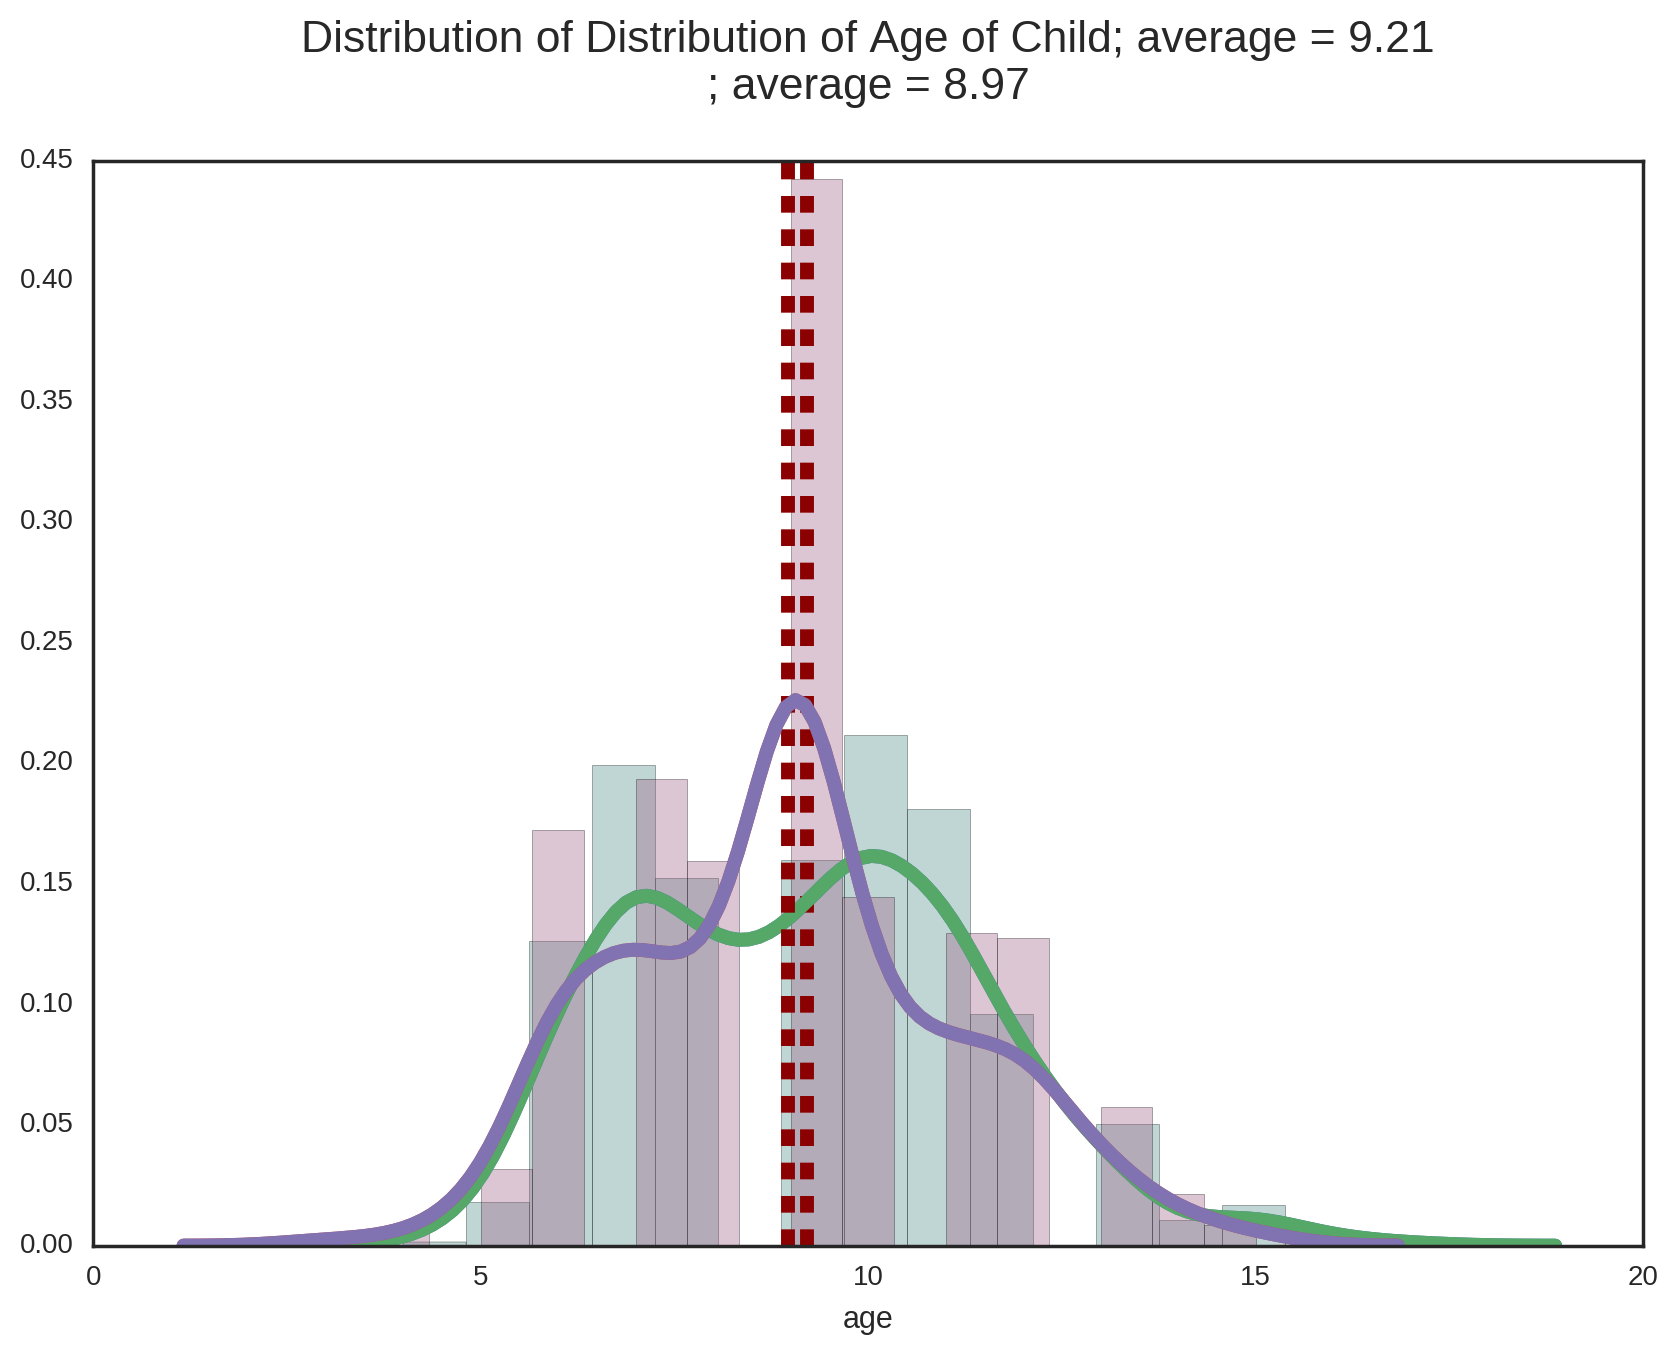

In [149]:
# Age of Child
histogram_plotter("Age of Child", df.age[df.ref == 'Yes'], df.age[df.ref == 'No'])

In [152]:
# Comparing the Syrian refugee children within the refugee camp and in non-camp communities in Jordan, 
# there is good overlap in the age representation. Both inside and outside the camp, the mean age is 9
# with nearly symmetrical distribution. The ages being targeted for this research project are betwen
# 5 and 12.

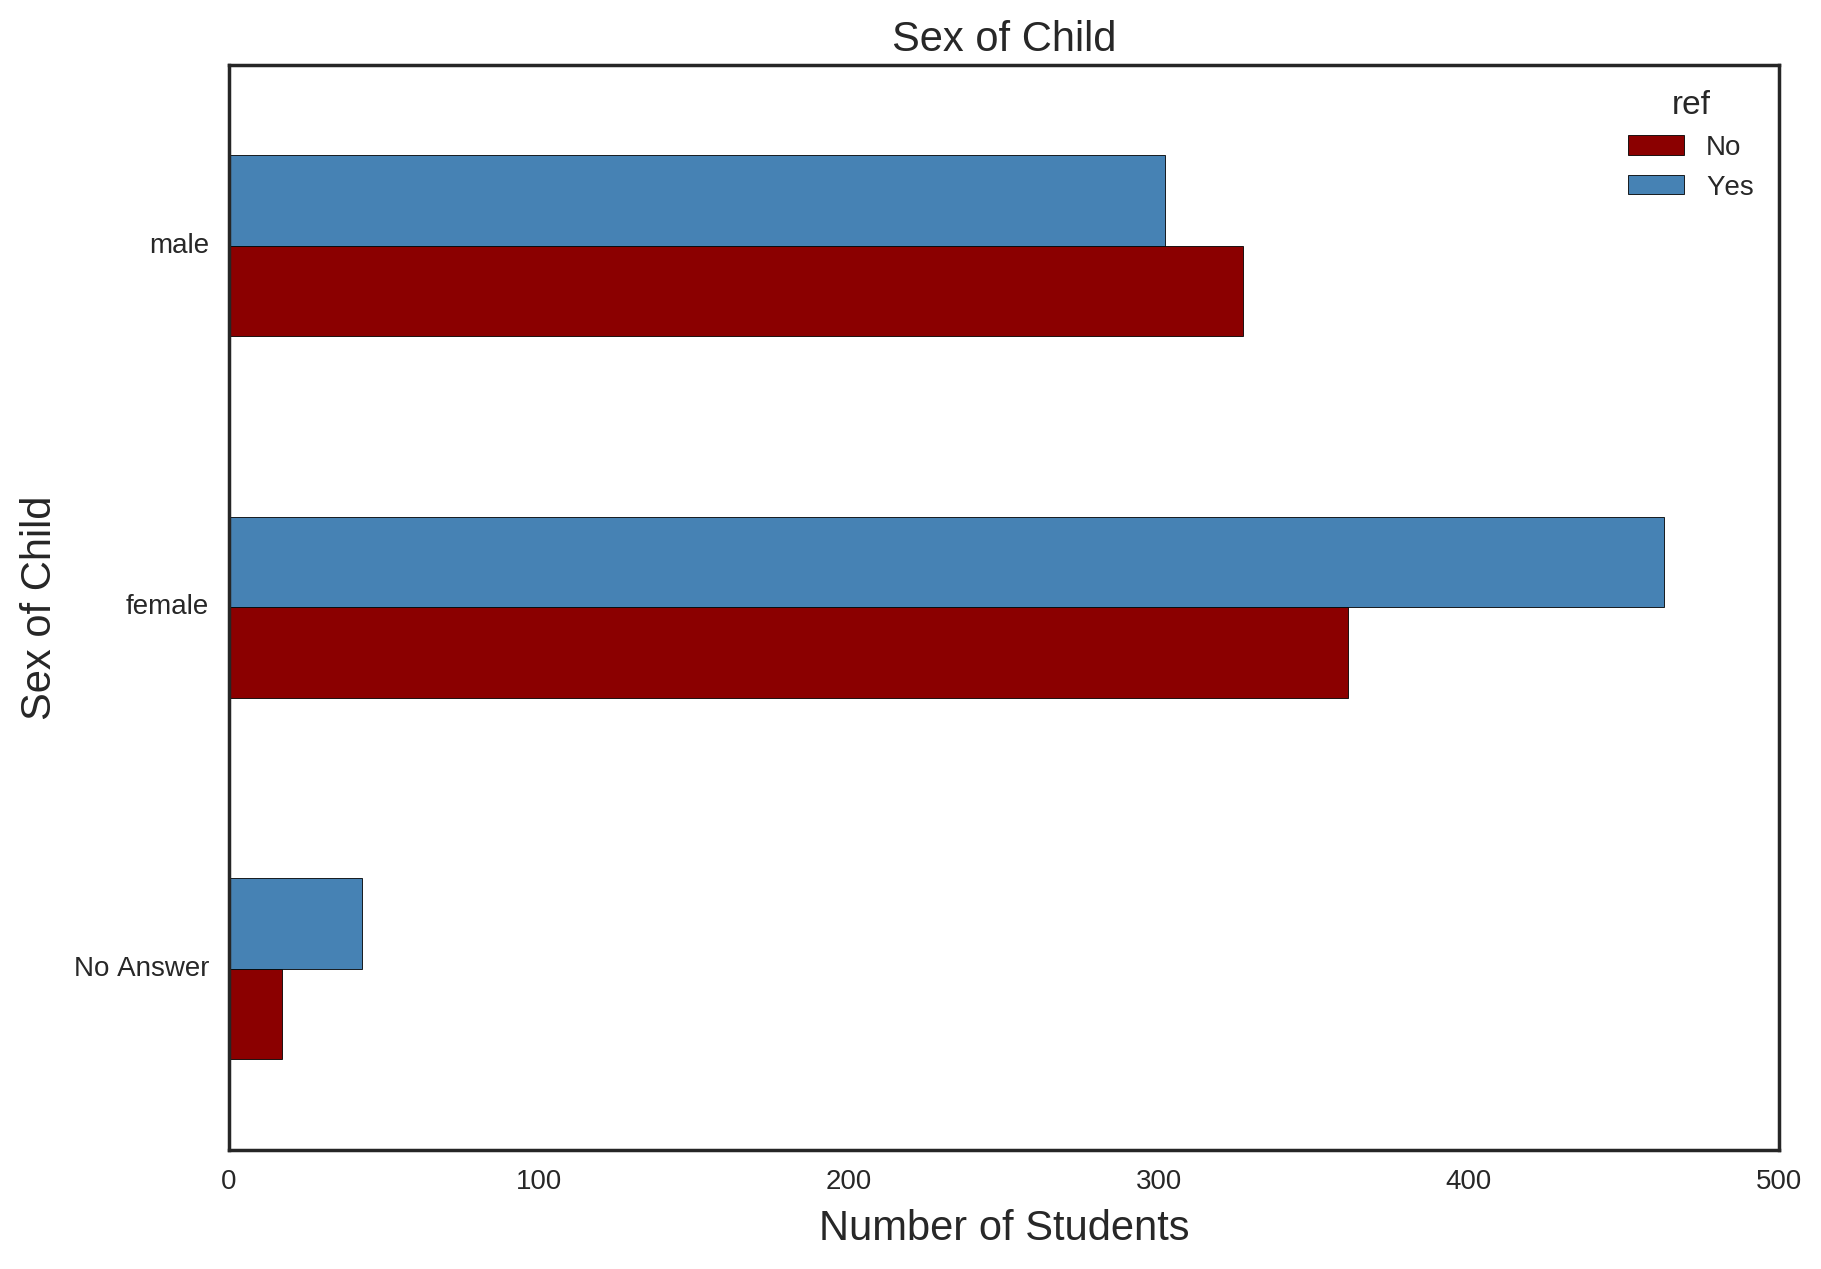

In [153]:
# Gender of Child
bargraph_plotter('Sex of Child', df.sex, df.ref)

In [155]:
# Comparing the Syrian refugee children within the refugee camp and in non-camp communities in Jordan, 
# there is good overlap in the gender representation. Within the refugee camps, there are significantly 
# more females than males. This makes sense as, within the refugee camps, I worked with schools mostly and
# schools made it a policy to keep females in school longer.

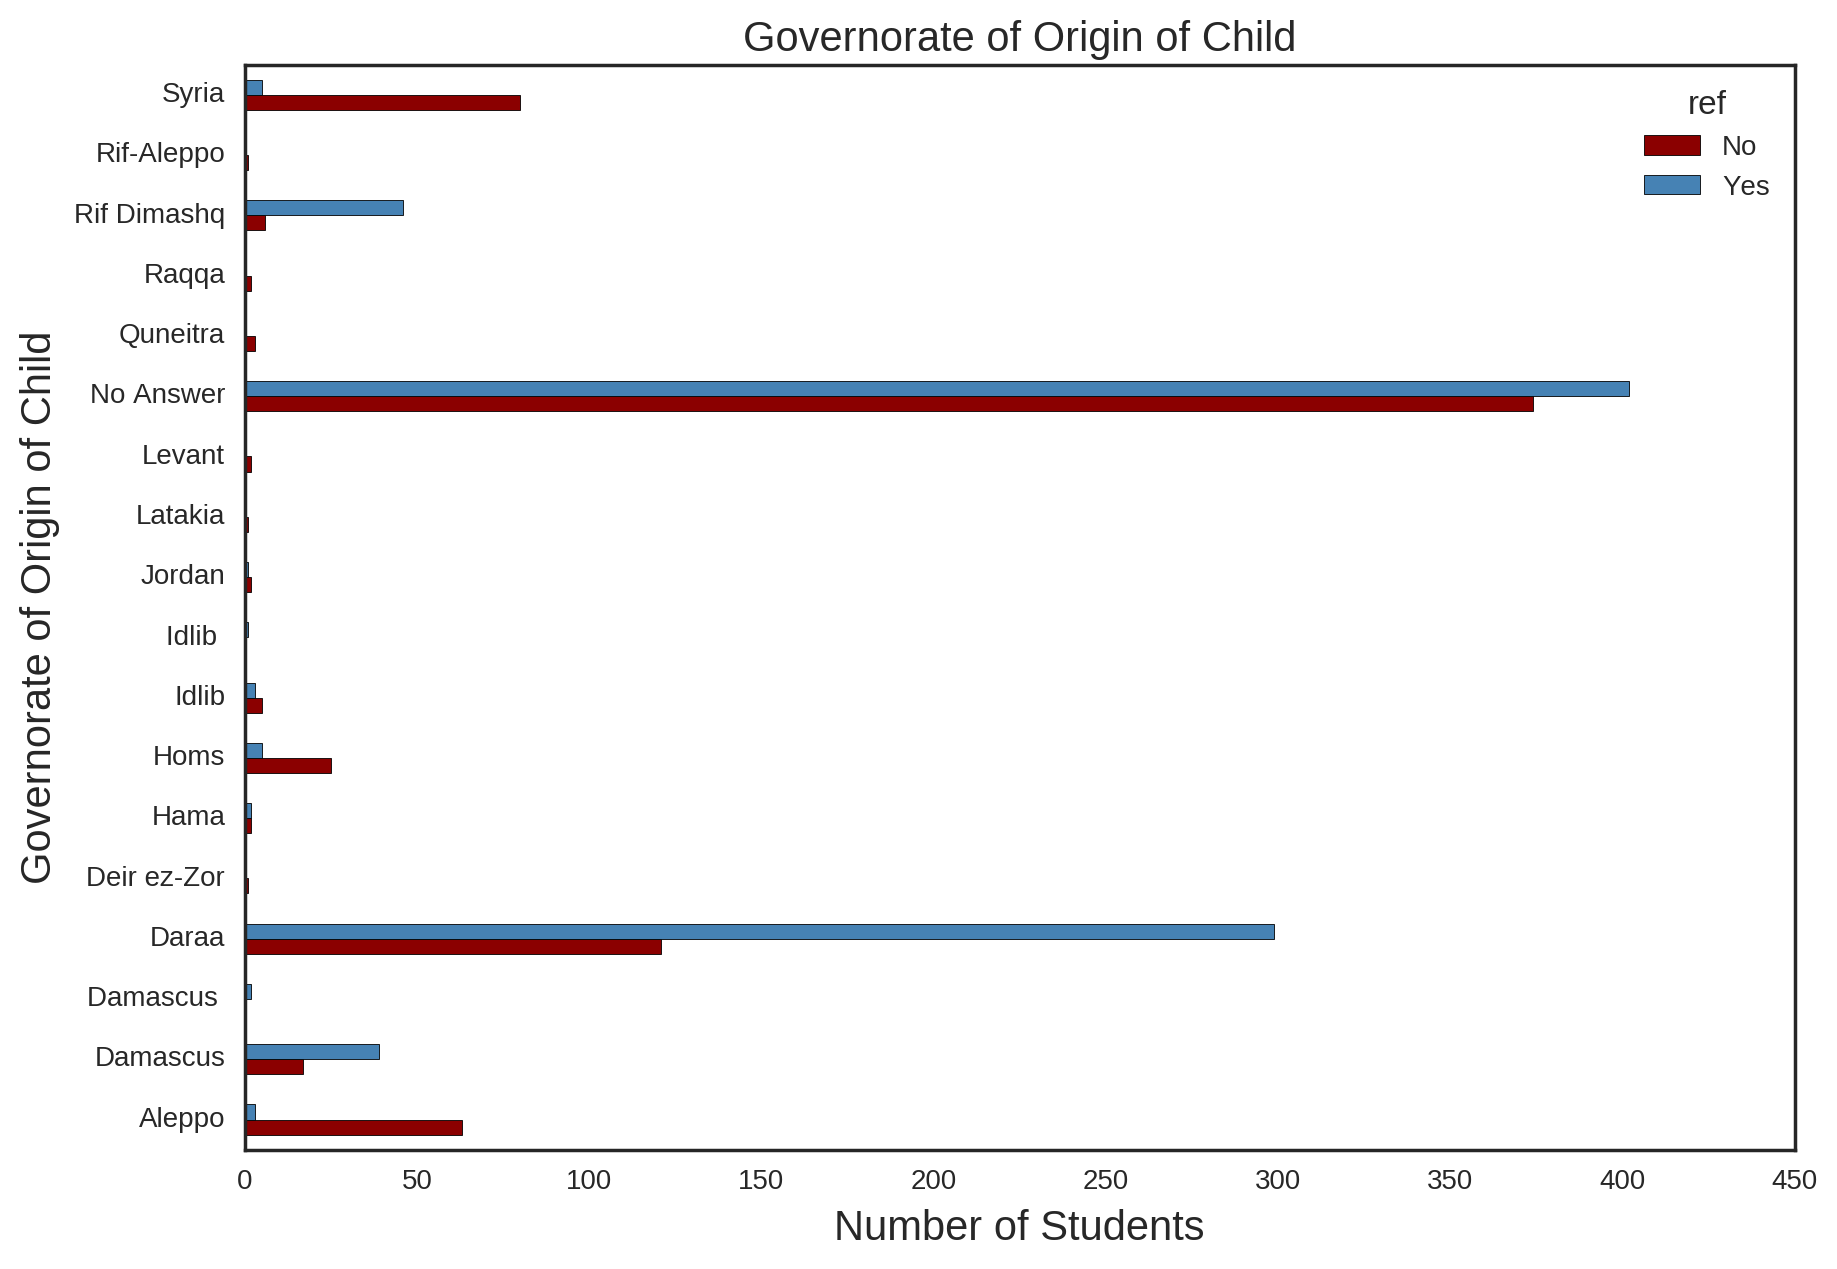

In [156]:
# Governorate of Origin
bargraph_plotter('Governorate of Origin of Child', df.goo, df.ref)

In [157]:
# In general, a majority of the Syrian refugees living in Jordan are from the Daraa governorate. This is 
# due to its geographic proximity to Jordan. Outside the refugee camp, however, there is more of a mix.
# This is also expected as those who live outside the camp may be able to do so due to their social networks
# or wealth. In performing covariate matching, I will match based on Governorate of Origin to mitigate
# this problem. 

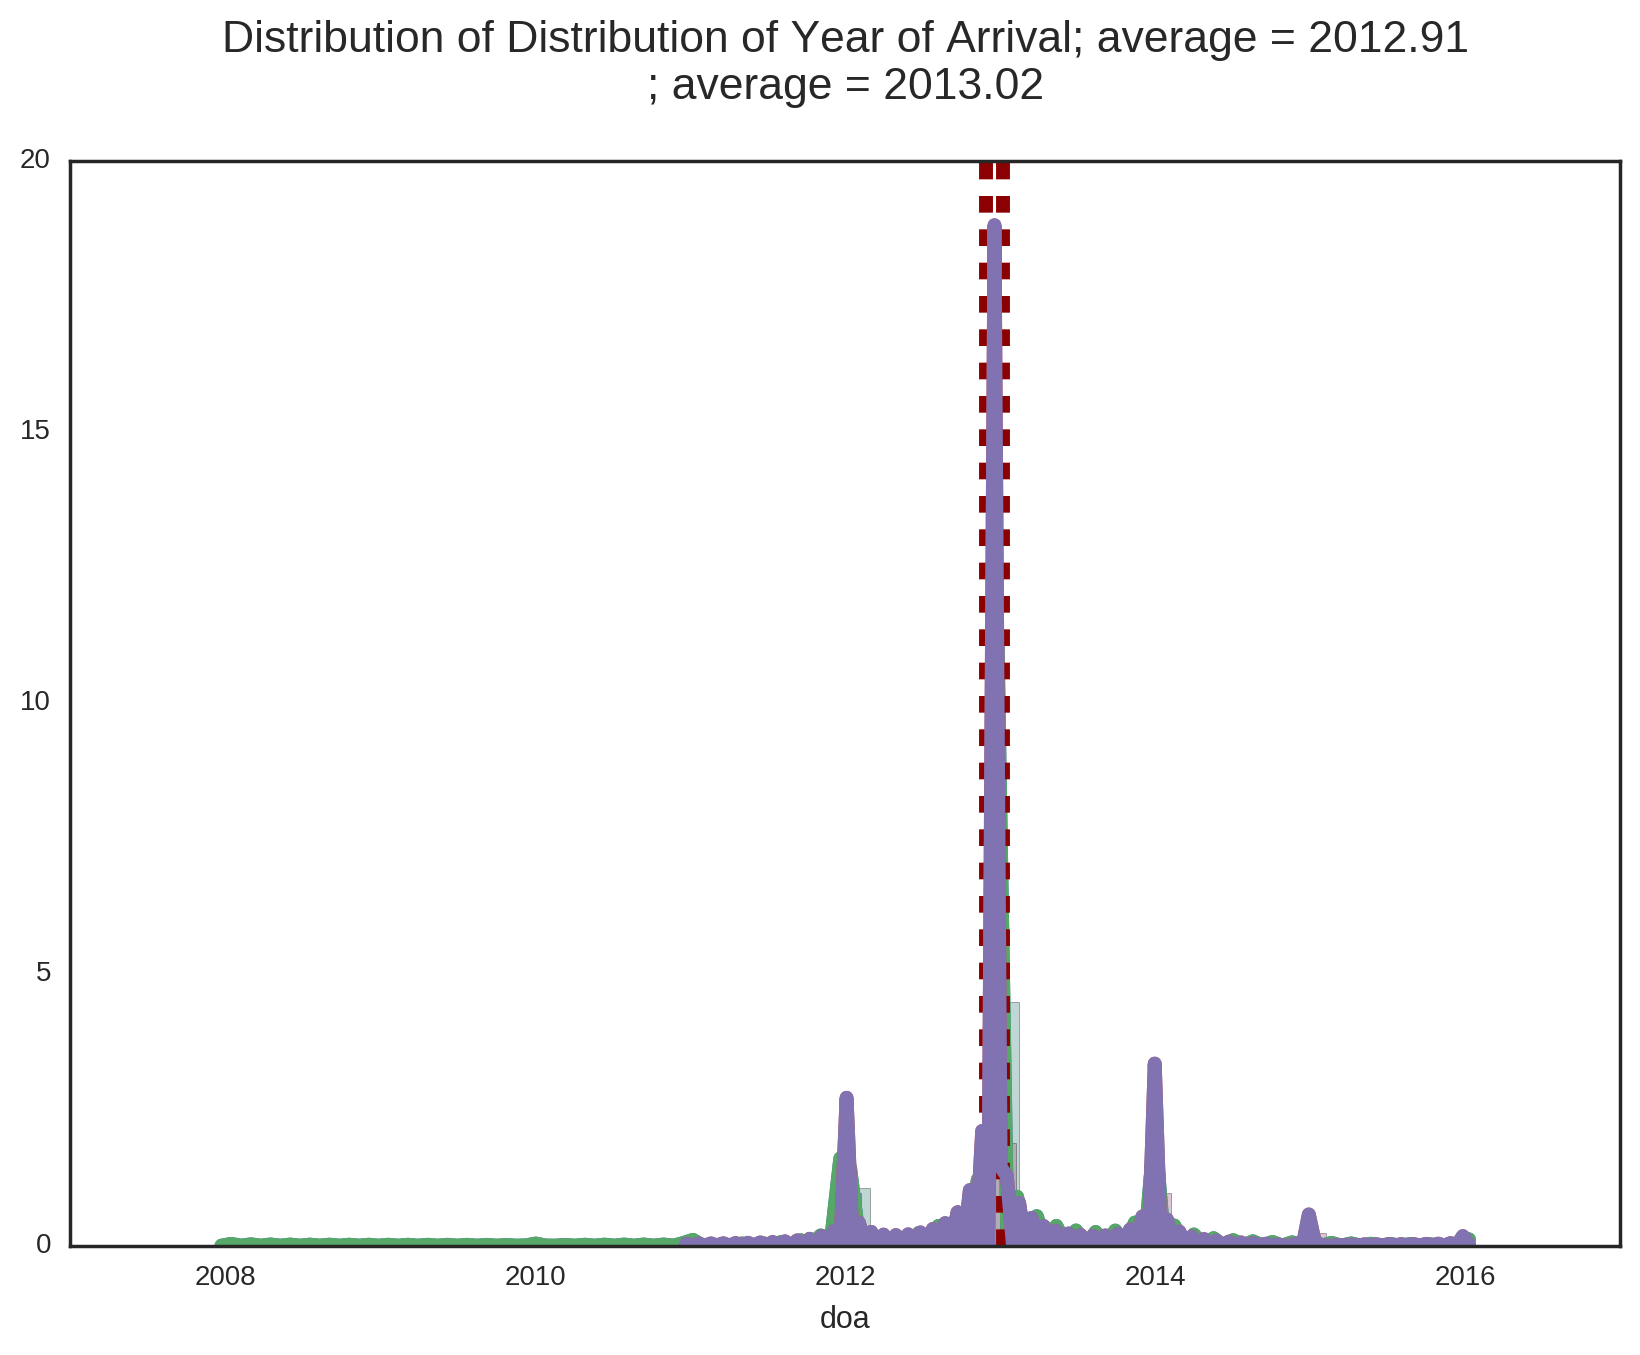

In [158]:
# Year of Arrival
histogram_plotter("Year of Arrival", df.doa[df.ref == 'Yes'], df.doa[df.ref == 'No'])

In [159]:
# A majority of the Syrian refugee children have been in Jordan since 2013. There is generally good overlap
# between children within refugee camps and children in non-camp communities in Jordan. 

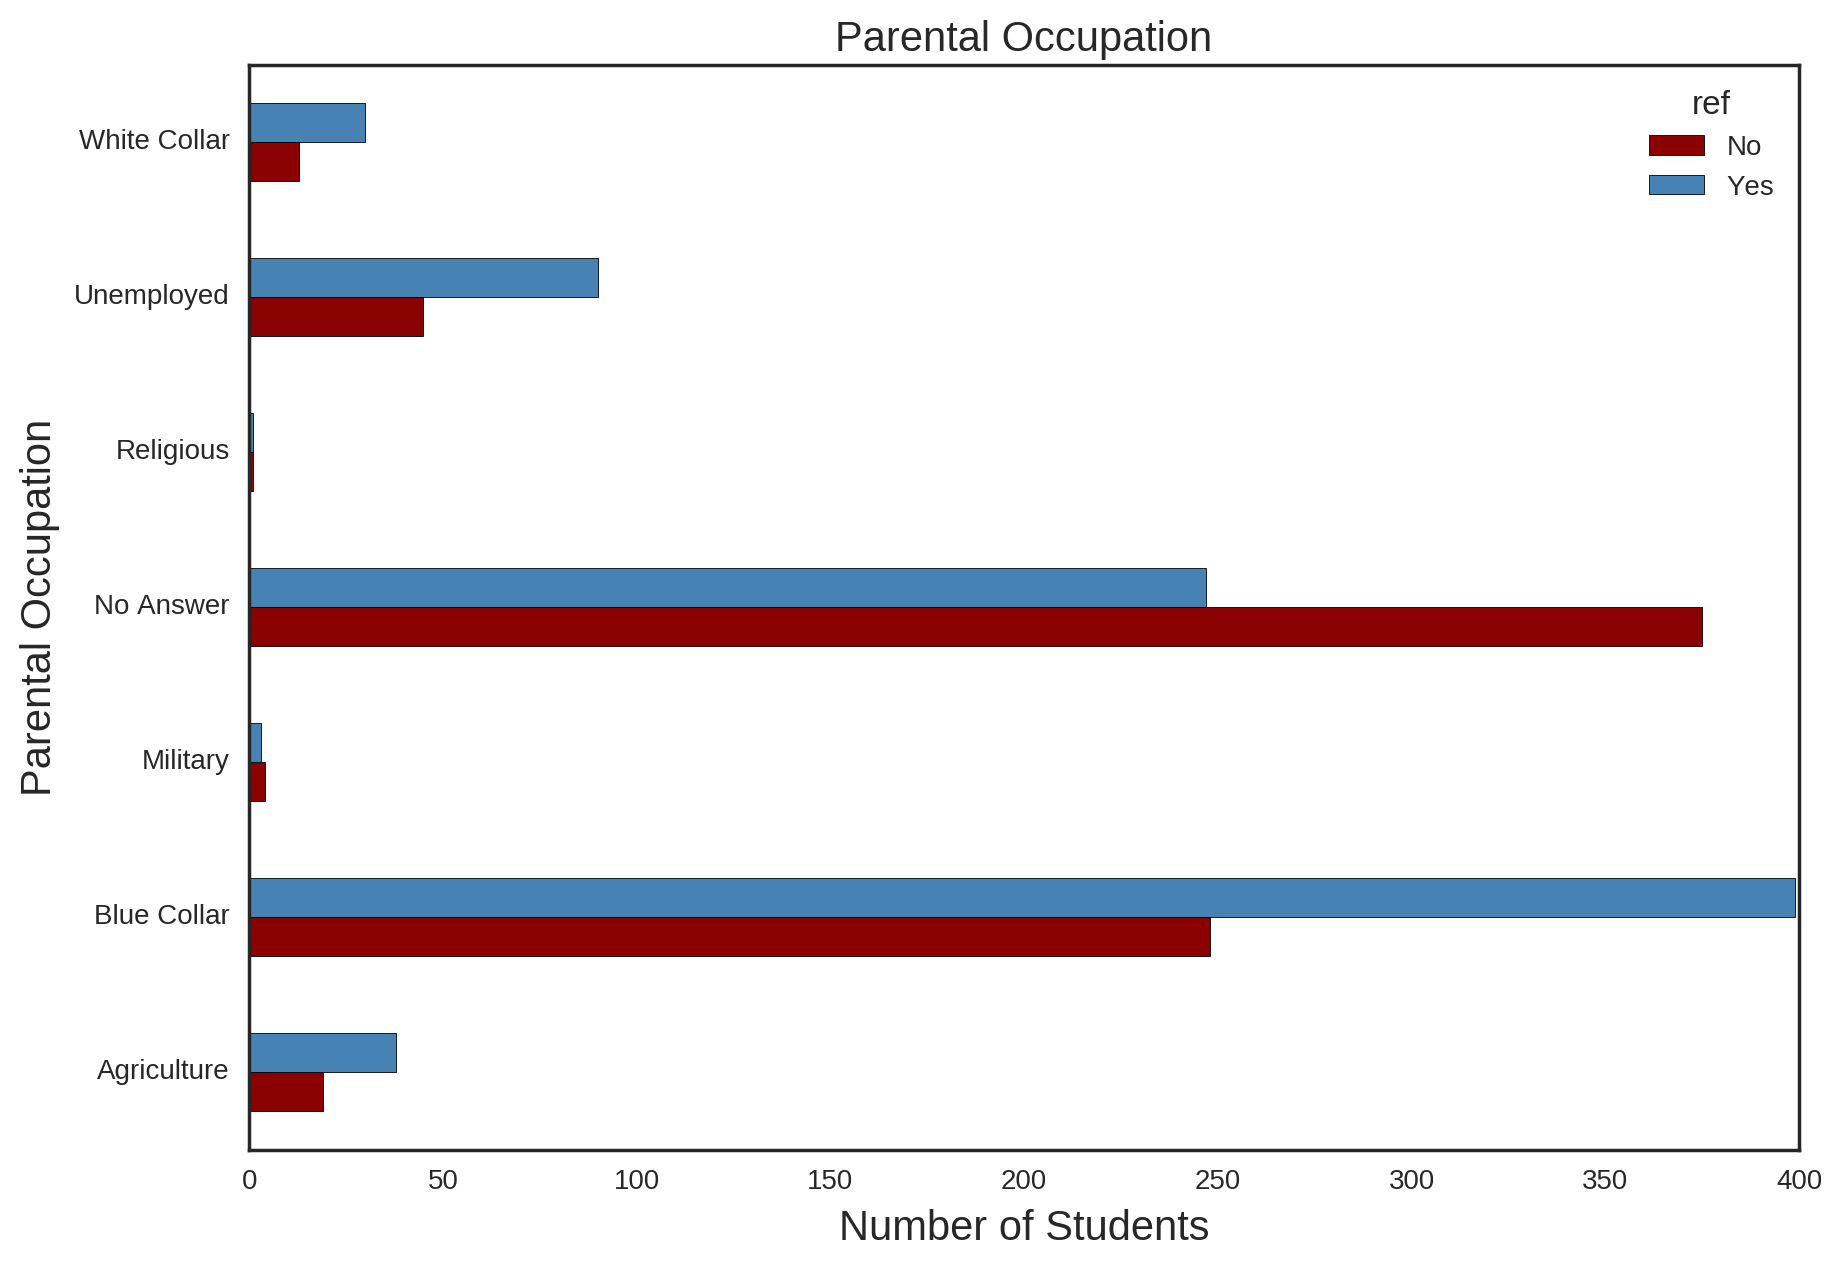

In [160]:
# Parental Occupation
bargraph_plotter('Parental Occupation', df.ind, df.ref)

In [161]:
#  A majority of the responses for Parental Occupation indicated jobs categorized as Blue Collar. Again, 
# since a majority of Syrian refugees living in Jordan are from the Daraa governorate, most of the jobs are
# Blue Collar in this region. In performing covariate matching, I will match based on Parental Occupation 
# to mitigate this problem. 

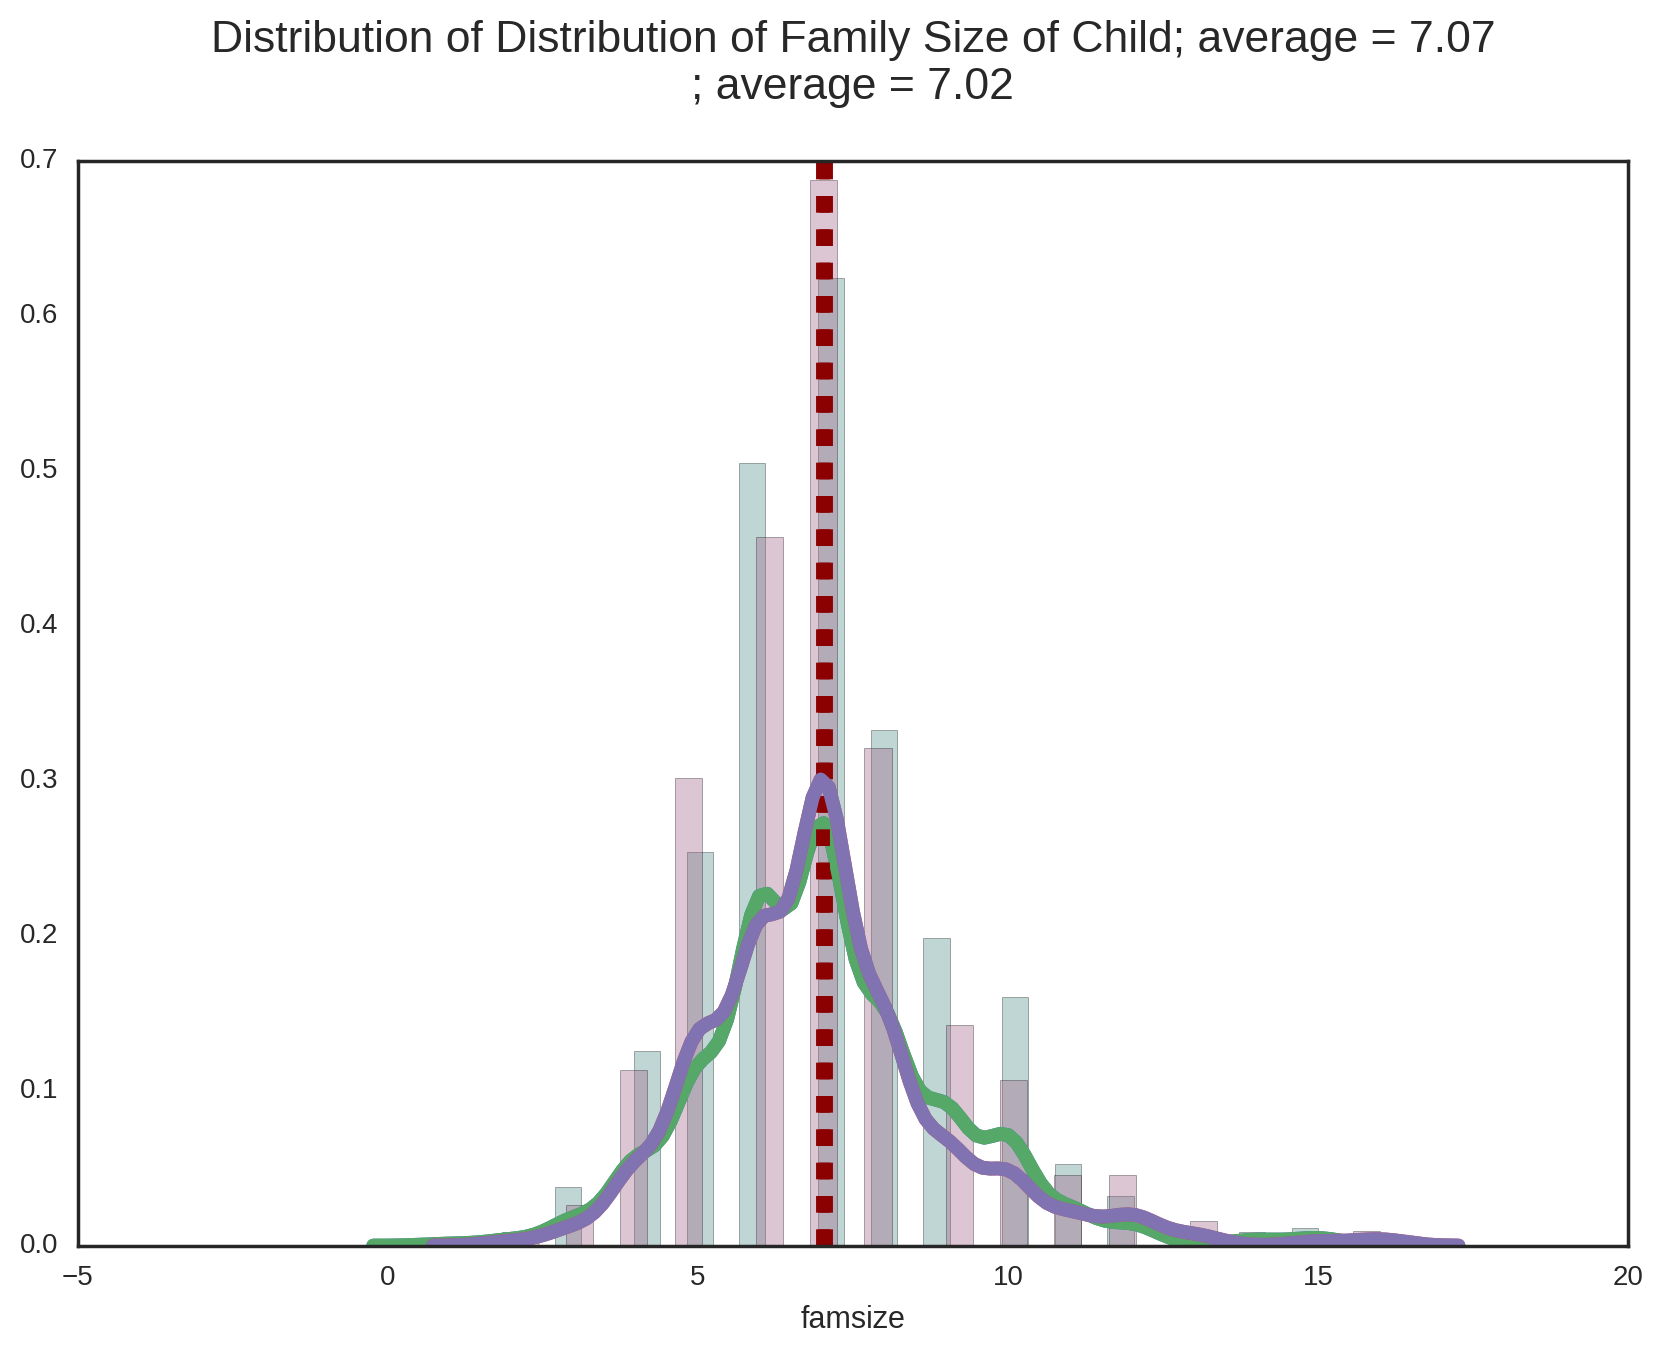

In [162]:
# Family Size
histogram_plotter("Family Size of Child", df.famsize[df.ref == 'Yes'], df.famsize[df.ref == 'No'])

In [163]:
# Comparing the Syrian refugee children within the refugee camp and in non-camp communities in Jordan, 
# there is good overlap in the family size representation. Both inside and outside the camp, the mean 
# family size is 9 with nearly symmetrical distribution. 

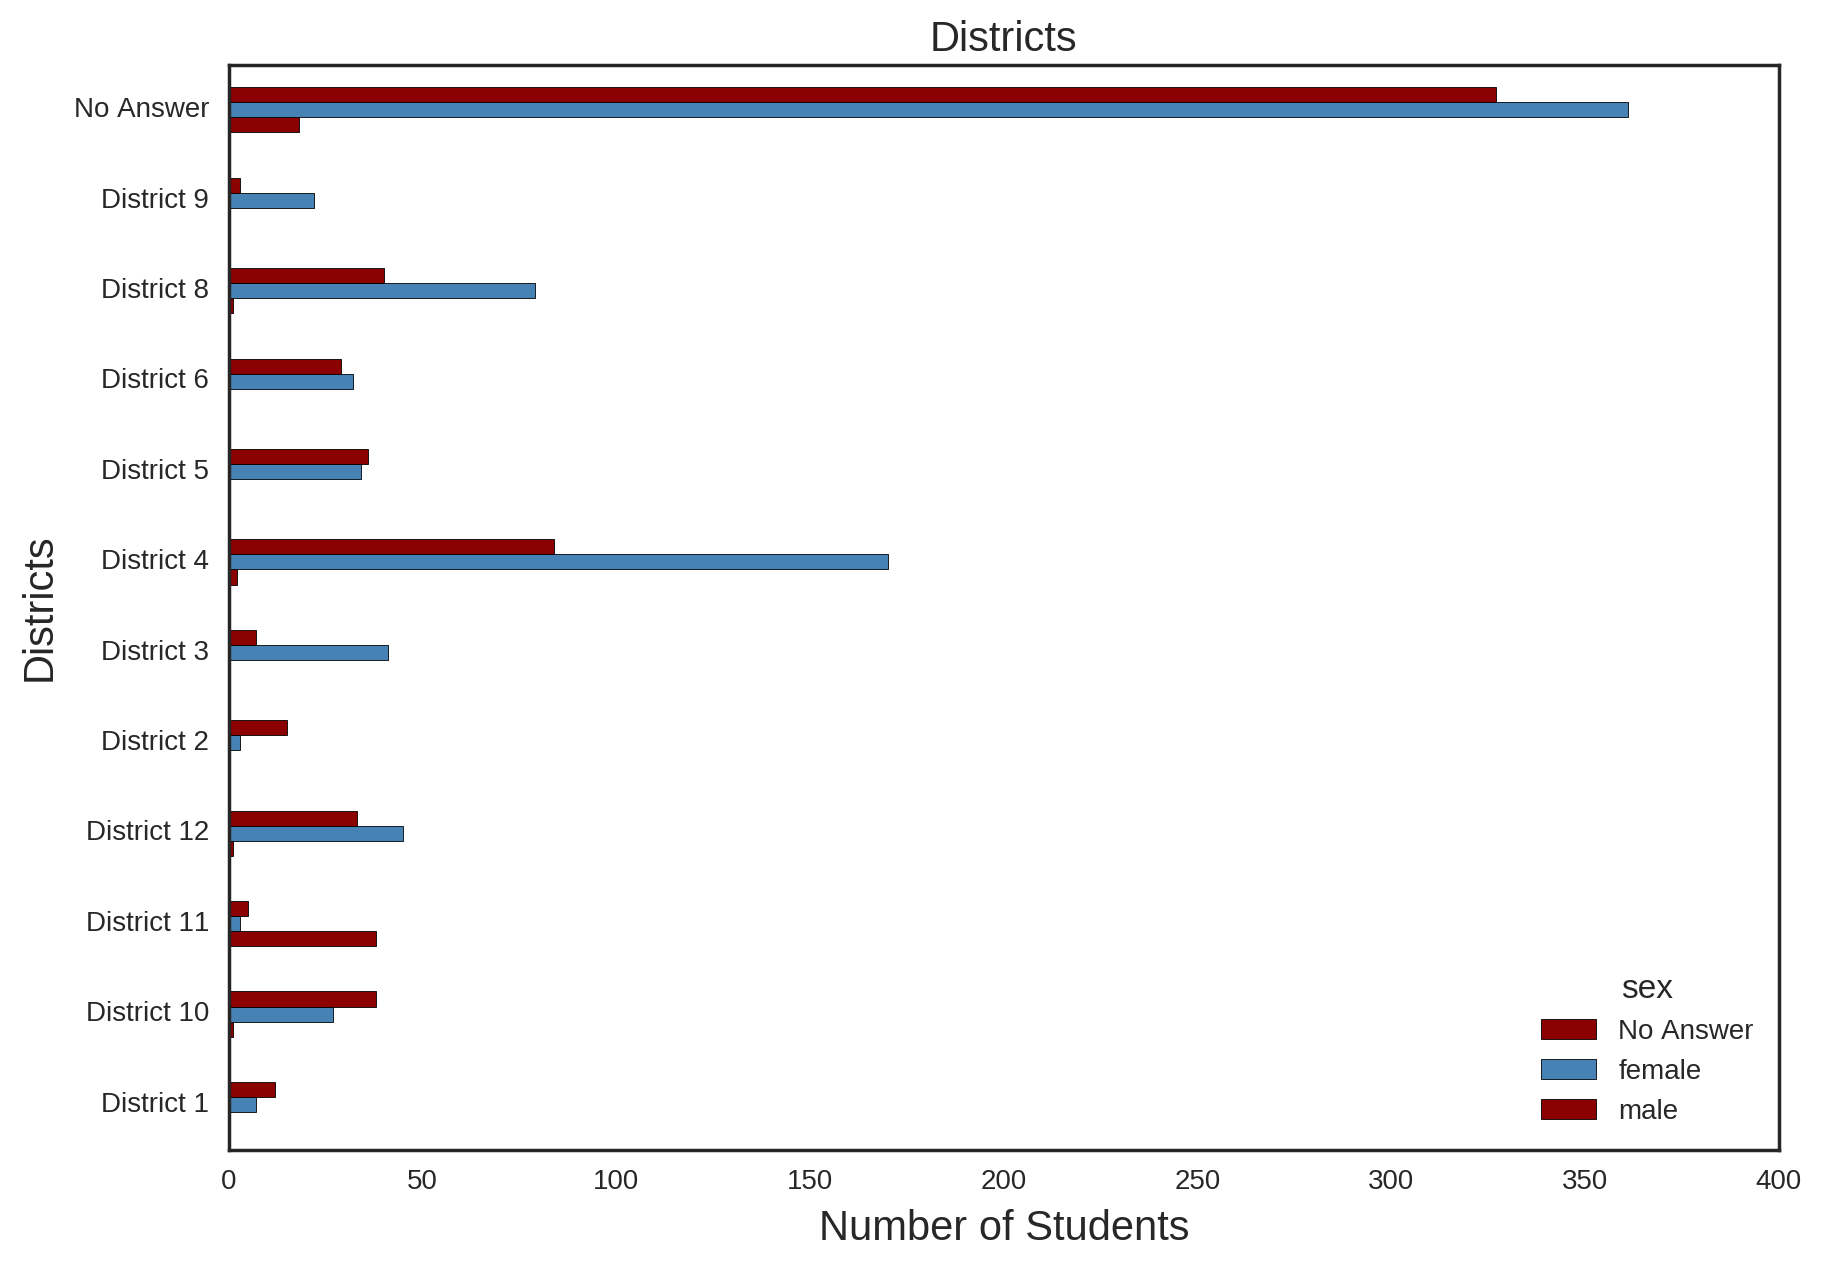

In [164]:
bargraph_plotter('Districts', df.dis, df.sex)

In [165]:
# As commented before, a majority of respondents were female. Most of the data collected were with schools
# which try to keep females in longer than males. 

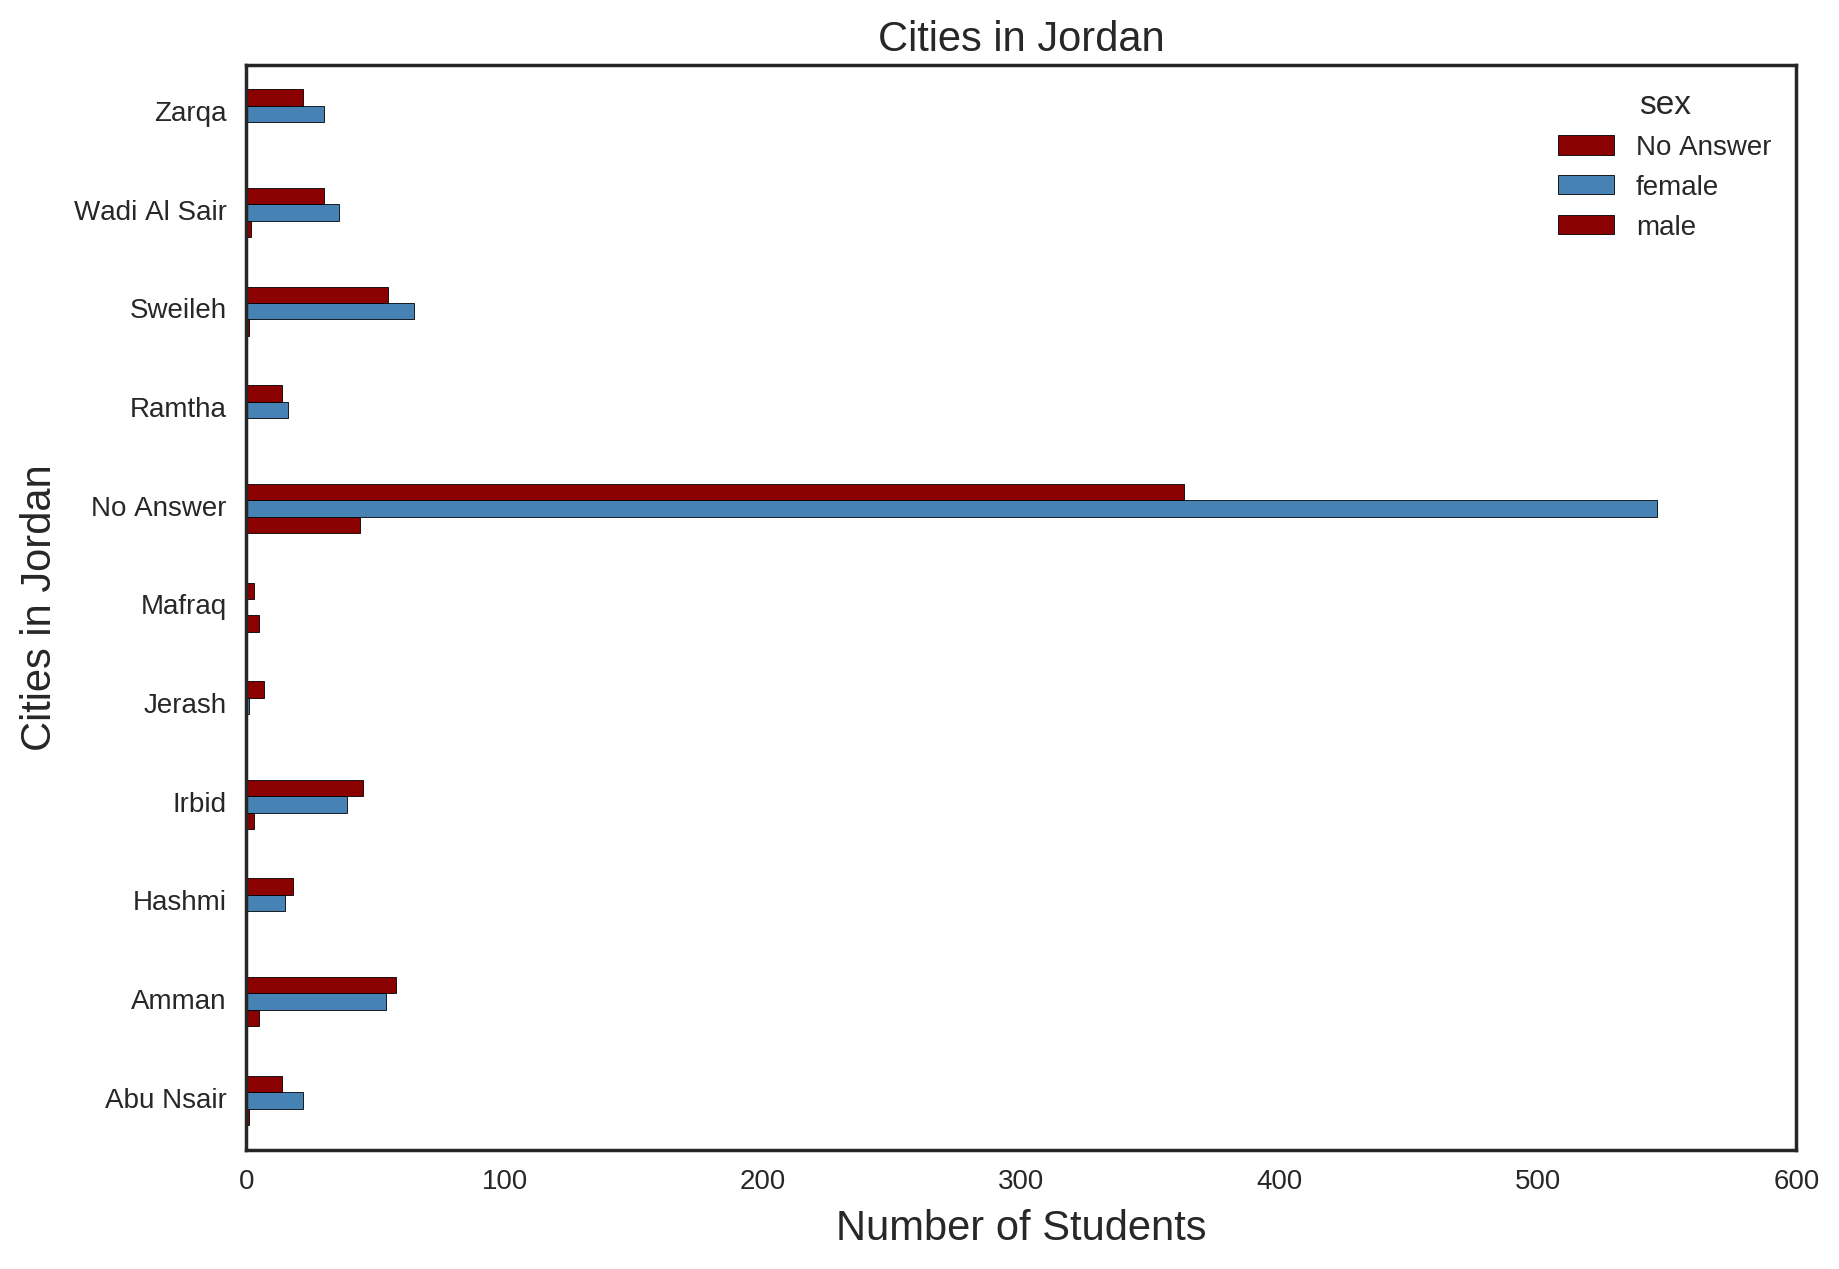

In [166]:
bargraph_plotter('Cities in Jordan', df.cit, df.sex)

In [167]:
# A majority of respondents living in non-camp communities were from Amman, Irbid, and Sweileh. This is not
# necessarily representative of the total Syrian refugee population in Jordan. This is mostly due to 
# the logistics of data collection efforts. 

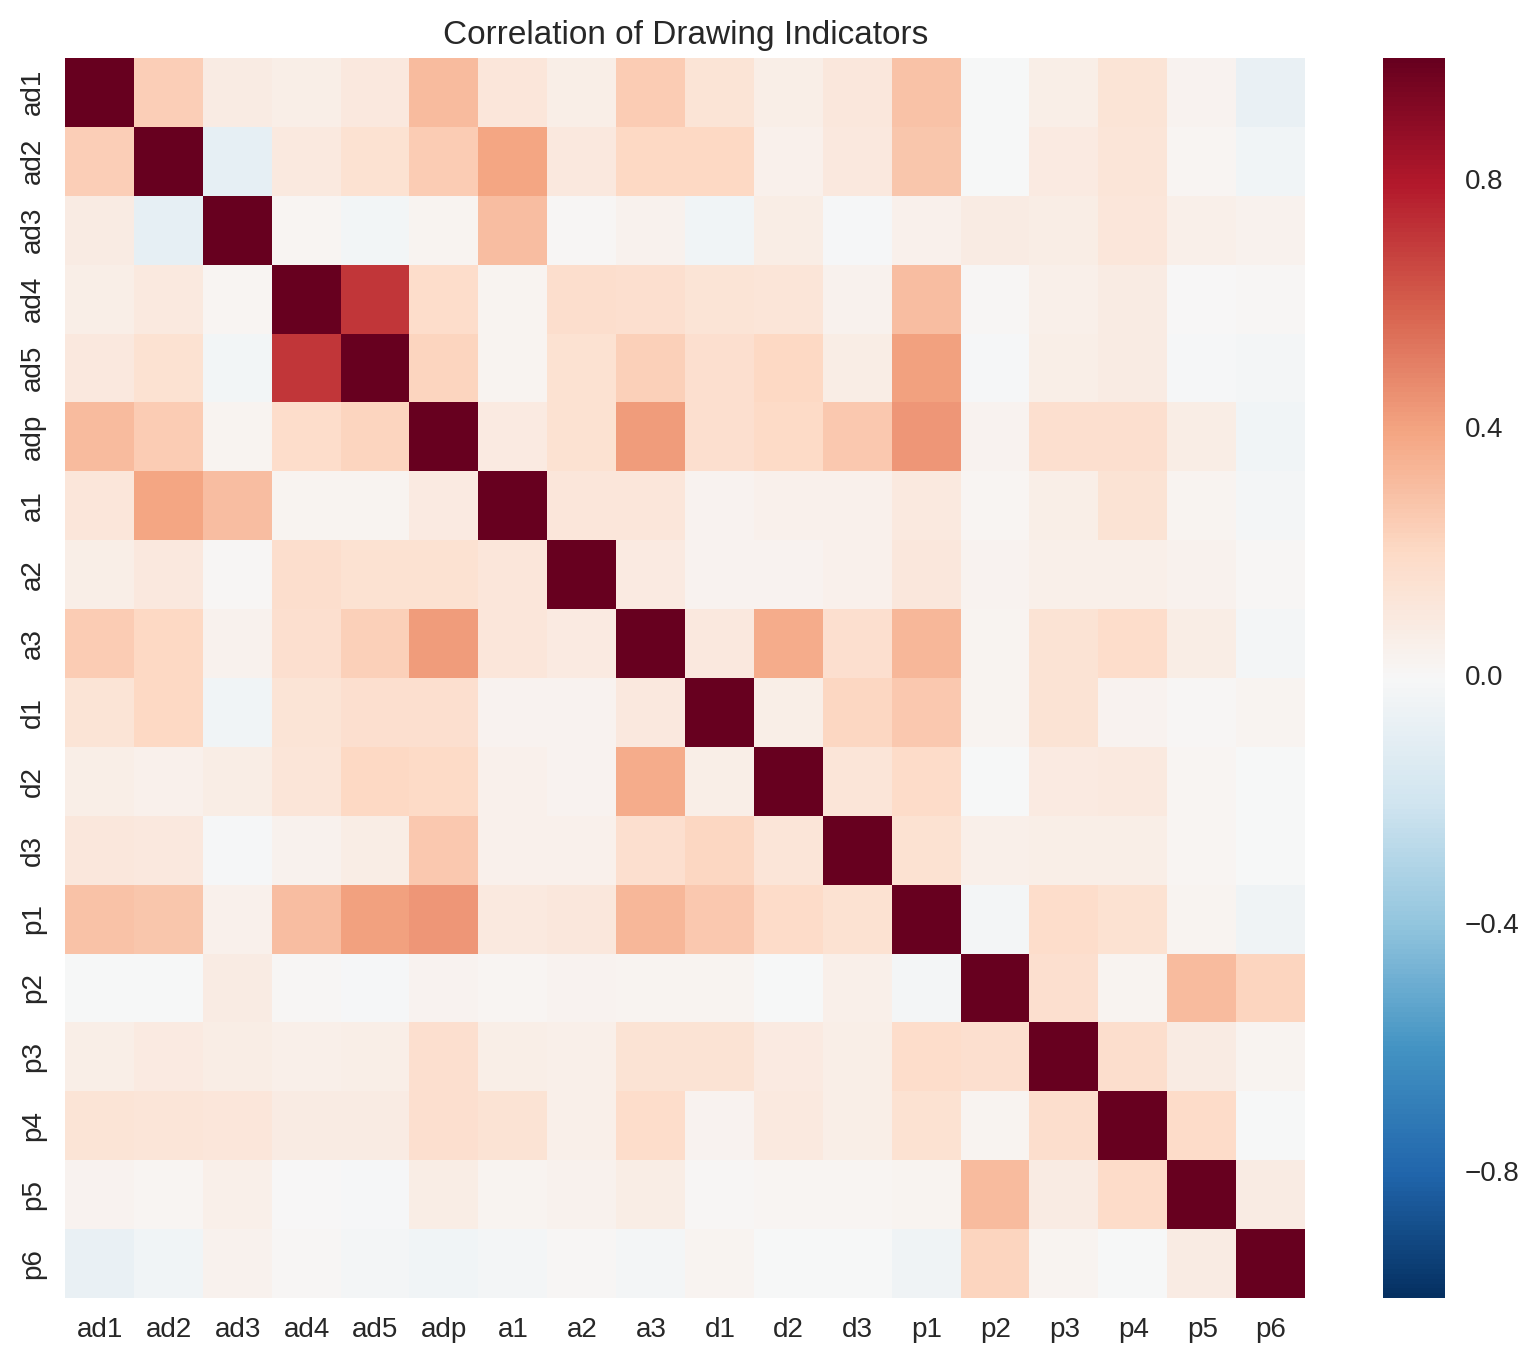

In [178]:
# Correlation of Drawing Indicators
df_indicators.corr()
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_title('Correlation of Drawing Indicators')
sns.heatmap(df_indicators.corr(), ax=ax)
plt.show()

In [169]:
# In observing the psychological indicators, a concern would arise if indicators were found to be 
# highly correlated with each other. However, from this correlation matrix, we can see that this
# is not too much of an issue. 

/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  app.launch_new_instance()
/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


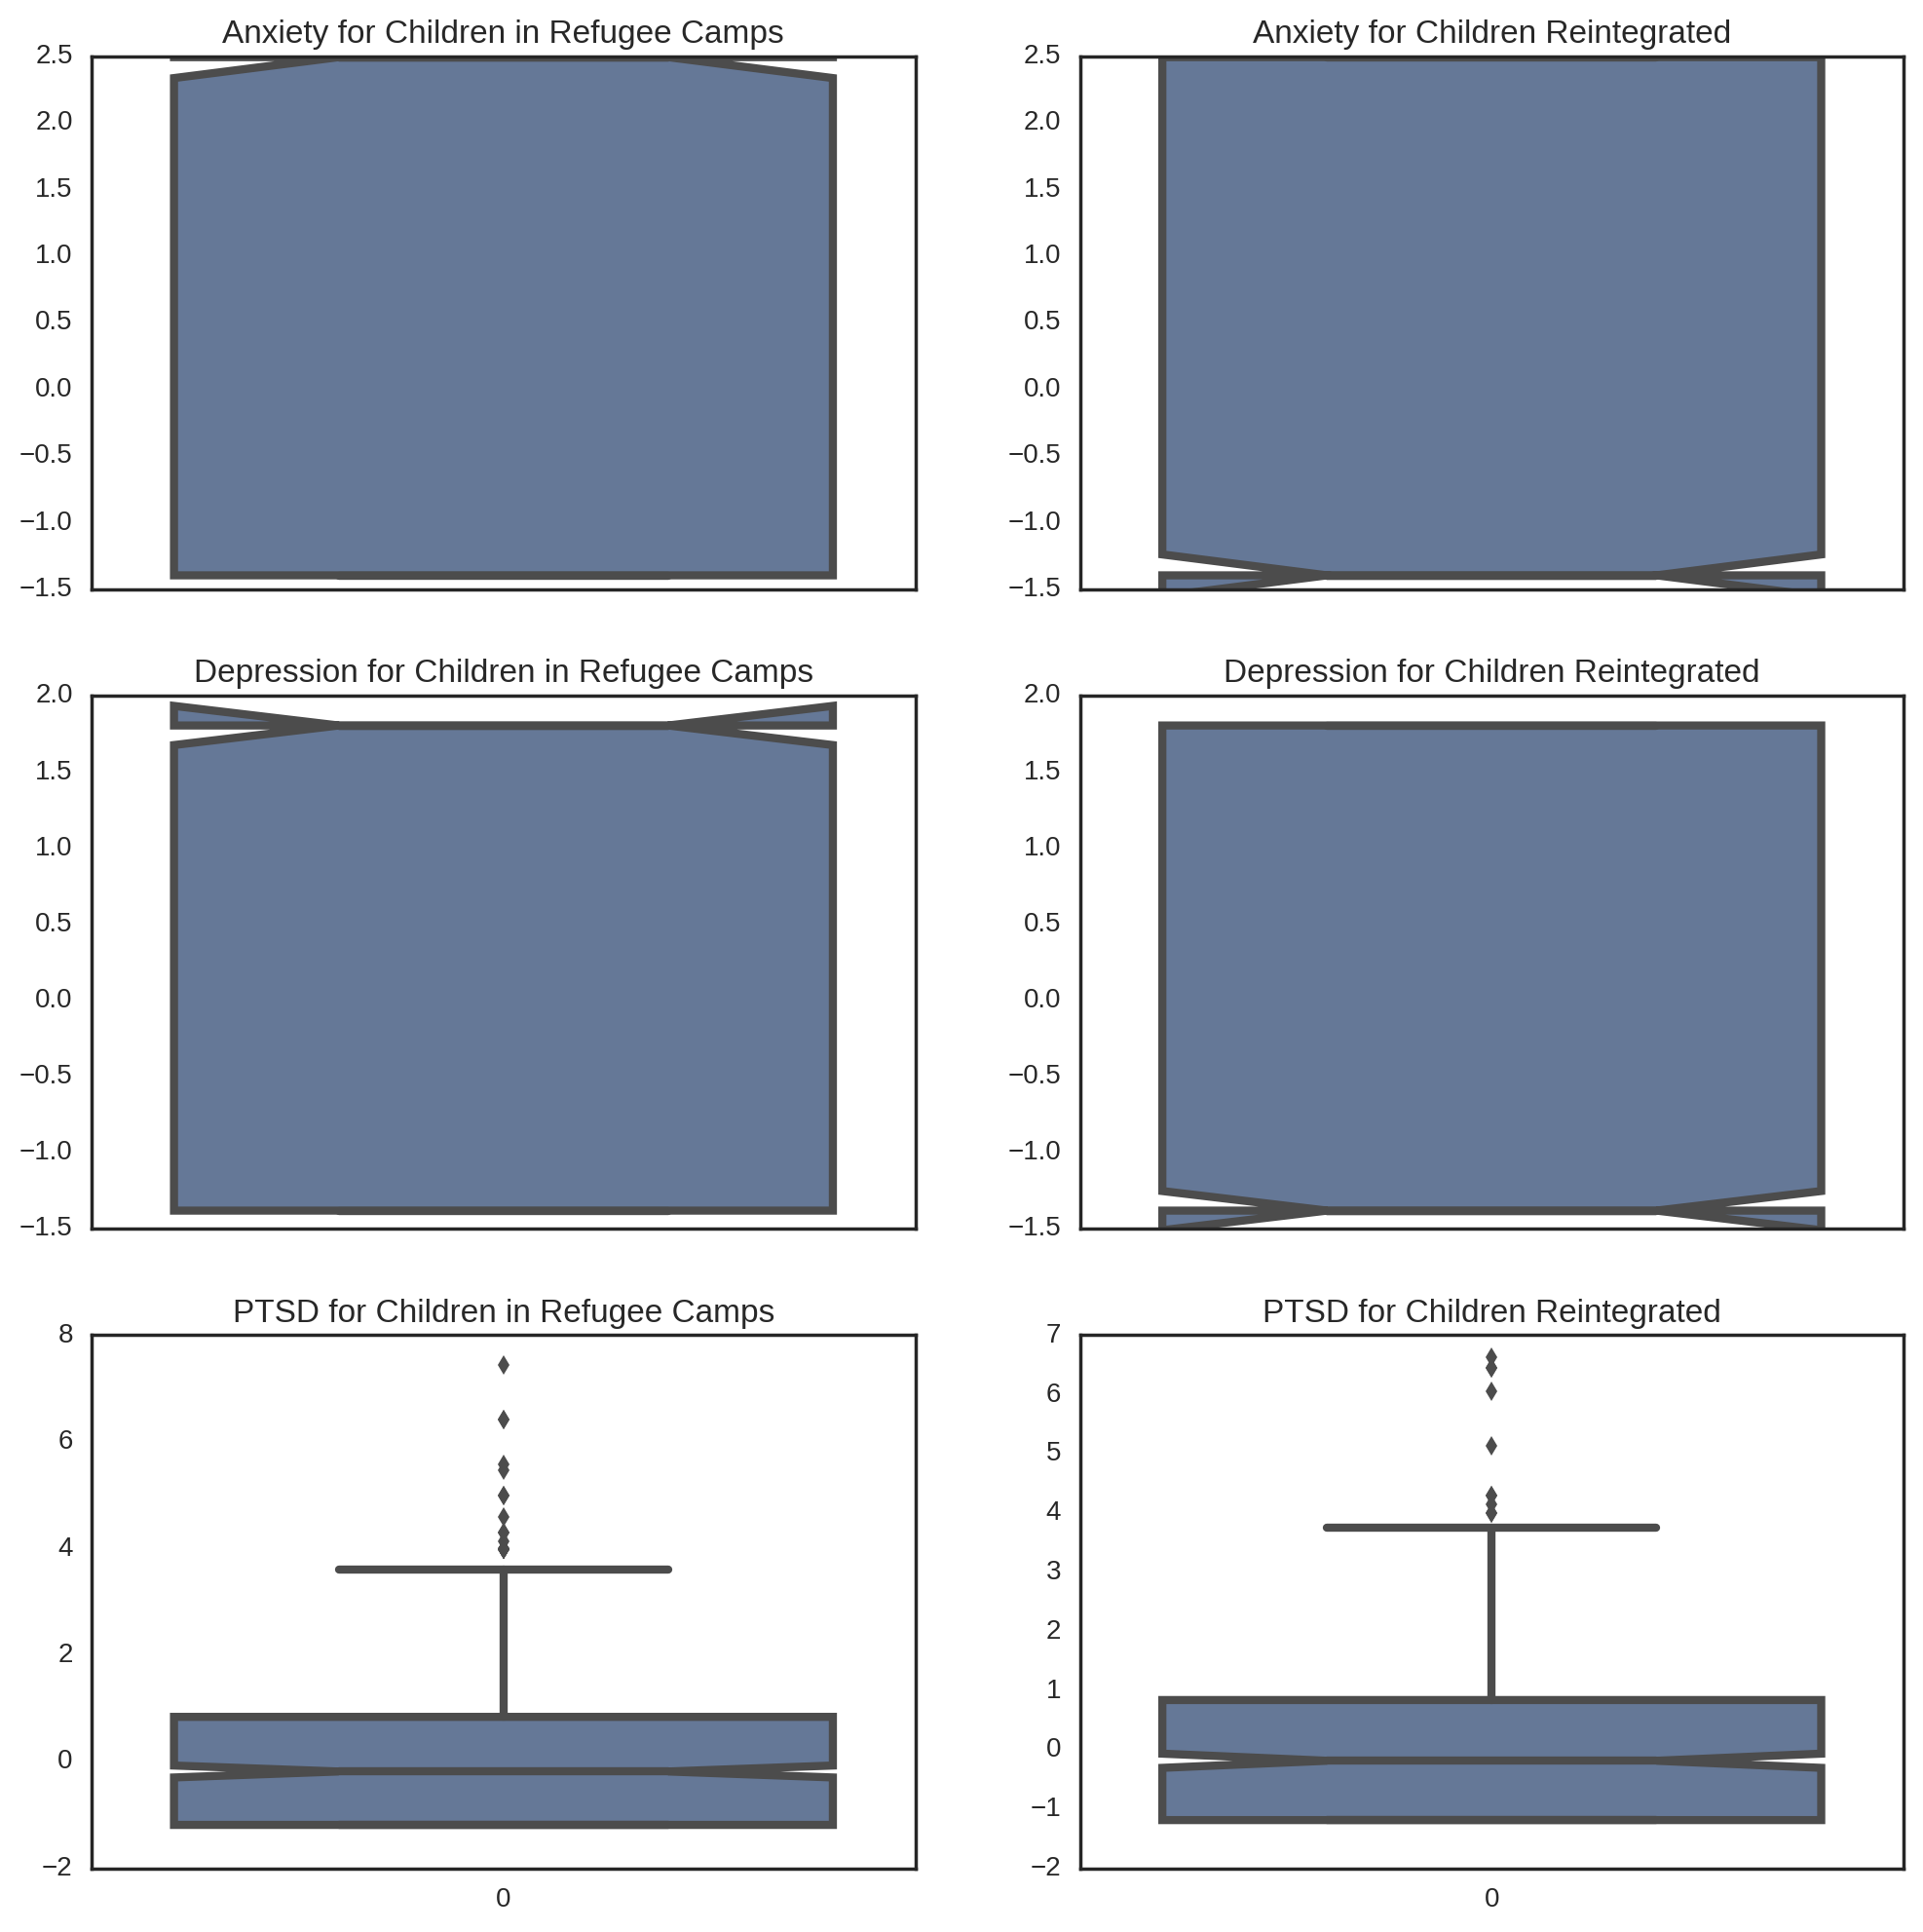

In [176]:
fig, axarr = plt.subplots(3, 2, figsize=(12,12), sharex=False, sharey=False)

axarr[0,0] = sns.boxplot(anxiety[df.ref == 'Yes'], orient='v', 
                         fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=axarr[0,0])
axarr[0,0].set_title('Anxiety for Children in Refugee Camps')

axarr[0,1] =  sns.boxplot(anxiety[df.ref == 'No'], orient='v',
            fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=axarr[0,1])
axarr[0,1].set_title('Anxiety for Children Reintegrated')


axarr[1,0] =  sns.boxplot(depression[df.ref == 'Yes'], orient='v',
            fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=axarr[1,0])
axarr[1,0].set_title('Depression for Children in Refugee Camps')

axarr[1,1] =  sns.boxplot(depression[df.ref == 'No'], orient='v',
            fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=axarr[1,1])
axarr[1, 1].set_title('Depression for Children Reintegrated')


axarr[2,0] =  sns.boxplot(ptsd[df.ref == 'Yes'], orient='v',
            fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=axarr[2,0])
axarr[2,0].set_title('PTSD for Children in Refugee Camps')

axarr[2,1] =  sns.boxplot(ptsd[df.ref == 'No'], orient='v',
            fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=axarr[2,1])
axarr[2,1].set_title('PTSD for Children Reintegrated')

plt.show()

In [177]:
# These graphs represent the key variables of interest. I show the difference in likelihood of Anxiety,
# Depression, and PTSD, comparing children living within Refugee Camps with children reintegrated into
# non-camp communities in Jordan. The average likelihood of Anxiety and Depression is observed to be higher 
# for children within refugee camps than for children reintegrated. However, there is still a lot of overlap.
# In continuing this research project, covariate matching will be utilized matching Syrian refugee children
# using Age, Gender, Governorate of Origin, Year of Arrival, Parental Occupation, and Family Size. 

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

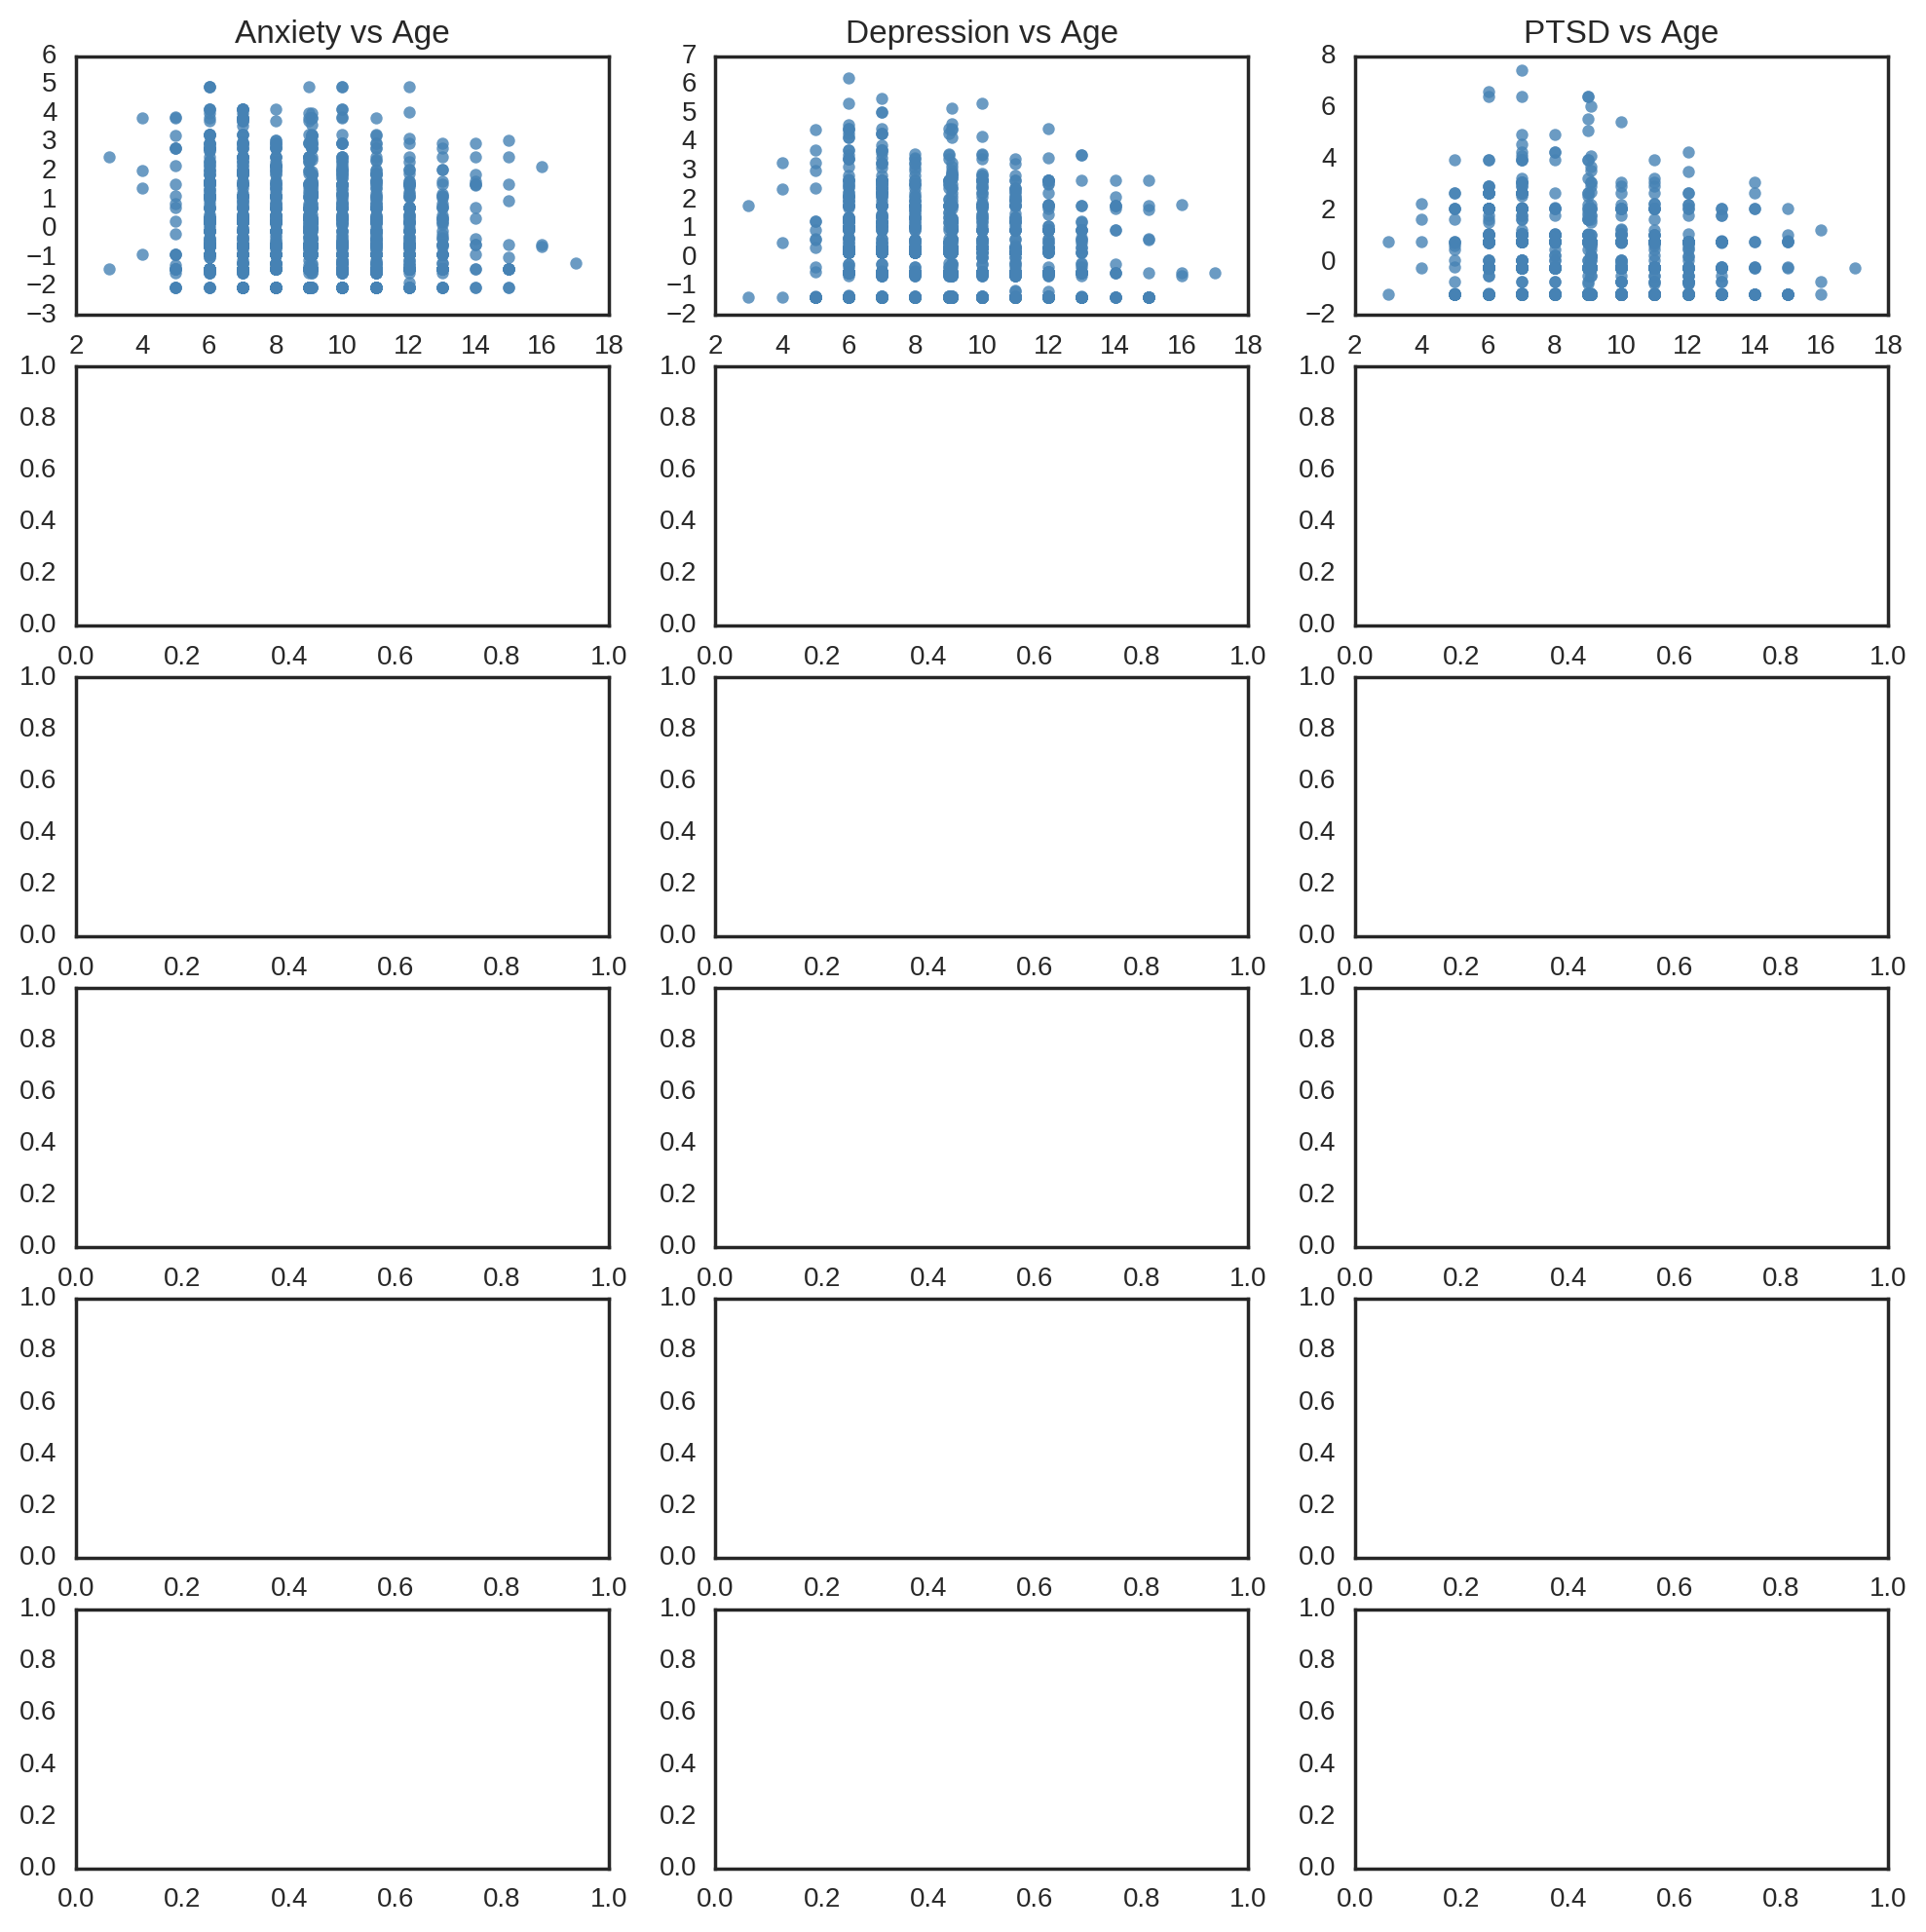

In [172]:
fig, axarr = plt.subplots(6, 3, figsize=(12,12), sharex=False, sharey=False)

axarr[0,0] = sns.regplot(df.age, anxiety, fit_reg=False, color='steelblue', ax=axarr[0,0])
axarr[0,0].set_title('Anxiety vs Age')
axarr[0,1] = sns.regplot(df.age, depression, fit_reg=False, color='steelblue', ax=axarr[0,1])
axarr[0,1].set_title('Depression vs Age')
axarr[0,2] = sns.regplot(df.age, ptsd, fit_reg=False, color='steelblue', ax=axarr[0,2])
axarr[0,2].set_title('PTSD vs Age')

axarr[1,0] = df.groupby([df.sex,anxiety]).size().unstack().plot(kind="barh", color=['darkred', 'steelblue'], ax=axarr[1,0])
axarr[1,0].set_title('Anxiety vs Gender')
axarr[1,1] = df.groupby([df.sex,depression]).size().unstack().plot(kind="barh", color=['darkred', 'steelblue'], ax=axarr[1,1])
axarr[1,1].set_title('Depression vs Gender')
axarr[1,2] = df.groupby([df.sex,ptsd]).size().unstack().plot(kind="barh", color=['darkred', 'steelblue'], ax=axarr[1,2])
axarr[1,2].set_title('PTSD vs Gender')

axarr[2,0] = sns.regplot(df.goo, anxiety, fit_reg=False, color='steelblue', ax=axarr[2,0])
axarr[2,0].set_title('Anxiety vs Governorate of Origin')
axarr[2,1] = sns.regplot(df.goo, depression, fit_reg=False, color='steelblue', ax=axarr[2,1])
axarr[2,1].set_title('Depression vs Governorate of Origin')
axarr[2,2] = sns.regplot(df.goo, ptsd, fit_reg=False, color='steelblue', ax=axarr[2,2])
axarr[2,2].set_title('PTSD vs Governorate of Origin')

axarr[3,0] = sns.regplot(df.doa, anxiety, fit_reg=False, color='steelblue', ax=axarr[3,0])
axarr[3,0].set_title('Anxiety vs Year of Arrival')
axarr[3,1] = sns.regplot(df.doa, depression, fit_reg=False, color='steelblue', ax=axarr[3,1])
axarr[3,1].set_title('Depression vs Year of Arrival')
axarr[3,2] = sns.regplot(df.doa, ptsd, fit_reg=False, color='steelblue', ax=axarr[3,2])
axarr[3,2].set_title('PTSD vs Year of Arrival')

axarr[4,0] = sns.regplot(df.ind, anxiety, fit_reg=False, color='steelblue', ax=axarr[4,0])
axarr[4,0].set_title('Anxiety vs Parental Occupation')
axarr[4,1] = sns.regplot(df.ind, anxiety, fit_reg=False, color='steelblue', ax=axarr[4,1])
axarr[4,1].set_title('Depression vs Parental Occupation')
axarr[4,2] = sns.regplot(df.ind, anxiety, fit_reg=False, color='steelblue', ax=axarr[4,2])
axarr[4,2].set_title('PTSD vs Parental Occupation')

axarr[5,0] = sns.regplot(df.famsize, anxiety, fit_reg=False, color='steelblue', ax=axarr[5,0])
axarr[5,0].set_title('Anxiety vs Family Size')
axarr[5,1] = sns.regplot(df.famsize, anxiety, fit_reg=False, color='steelblue', ax=axarr[5,1])
axarr[5,1].set_title('Depression vs Family Size')
axarr[5,2] = sns.regplot(df.famsize, anxiety, fit_reg=False, color='steelblue', ax=axarr[5,2])
axarr[5,2].set_title('PTSD vs Family Size')
plt.show()

In [ ]:
# This is code that I was attempting to complete but wasn't able to fix a particular problem. I was 
# attempting to see if different independent variables (Age, Gender, Governorate of Origin, Year of Arrival,
# Parental Occupation, Family Size) on average prior to matching correlate with the Likelihood of Anxiety,
# Depression, and PTSD. If you could comment on what the problem was, I would greatly appreciate it.
# I believe the problem was in generating a bar graph for the second row. 

# Project 1 Report


    For my research project, I am studying the psychological impact of the Syrian refugee crisis on children living within refugee camps and reintegrated into non-camp communities in Jordan. In studying the psychological impacts of the Syrian refugee crisis, I focus on three dependent variables, likelihood of Anxiety, Depression, and PTSD. Each of these variables are composed of several indicators (Anxiety: 9 indicators, Depression: 9 indicators, PTSD: 7 indicators). Looking at a correlation matrix for these indicators, none of these indicators were highly correlated with each other. To perform dimensionality reduction, I utilize Principal Components Analysis reducing my 25 indicators to 3 variables. In continuing this research project, I plan to utilize covariate matching to compare Syrian refugee children with their "Nearest Neighbor" with the Treatment being reitegration from refugee camps into non-camp communities into Jordan. 
    
    The matching covariates I plan to use are Age, Gender, Governorate of Origin, Year of Arrival, Parental Occupation, and Family Size. For age, the mean was 9 and there was a good overlap between children in refugee camps and children reintegrated. In collecting my data, we specifically targetted children between the ages of 5 and 12. For gender, there were slighly more females than males. It was the policy of several schools to keep females in school longer to prevent situations of childhood marriage. For governorate of origin, a majority of respondents were from the Daraa governorate. This was expected due to the Daraa governorate being right over the border from Jordan. For year of arrival, the mean year of arrival is 2013 with good overlap between children in refugee camps and children reintegrated. This makes sense as Syrian refugees started coming into Jordan in greater numbers from 2012 to 2013. For parental occupation, a majority of children had fathers who previously worked in blue collar industries. Since a majority of Syrian refugees in Jordan are from the Daraa governorate where most of the jobs are in the blue collar industries, this was also expected. For family size, the mean was 7 and there was good overlap between children in refugee camps and children reintegrated. Most Syrian families are generally large in number and try to keep together after fleeing the conflict.

    My key finding is that Likelihood of Anxiety, Depression, and PTSD are higher for children living within refugee camps compared to children reintegrated into non-camp communities in Jordan. Despite the many health, education, and psychosocial support initiatives currently being implemented inside refugee camps, living within a temporary environment with limited resources and a dense population also going through the same trauma such as that of a refugee camp can have harmful effects on the psychological well-being of children. Reintegration into non-camp communities may have the potential to mitigate these impacts. This finding, however, this is without taking into account other explanatory variables such as Age, Gender, Governorate of Origin, Year of Arrival, Parental Occupation, and Family Size. My plan is to perform covariate matching utilizing these variables as covariates and to utilize machine learning methods to better study the psychological impact of the refugee crisis on children and the potentially mitigating impact of reintegration.
